### Homework 5

#### ELEC-E8740 - Basics of sensor fusion Autumn'21
#### Problem description:

Implement Gauss-Newton with line search algorithm to minimize $J(x) = (1.1 − x - sin(x))^2$.
Use grid search with grid $\gamma \in [0, 1/10, 2/10,...,1]$

The update rule is given by
\begin{equation}
\hat{\mathbf{x}}^{(i+1)}
        = \hat{\mathbf{x}}^{(i)} + \gamma \Delta \hat{\mathbf{x}}^{(i+1)} 
\label{eq:gen_gd_update}
\end{equation}

The update direction is defined as
\begin{equation}
\Delta \hat{\mathbf{x}}^{(i+1)}
        = (G_x^T(\hat{\mathbf{x}}^{(i)})R^{-1}G_x(\hat{\mathbf{x}}^{(i)}))^{-1}G_x^T(\hat{\mathbf{x}}^{(i)})R^{-1}( y-g(\hat{\mathbf{x}}^{(i)}))
\end{equation}

In [109]:
%matplotlib inline
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

### Define functions

In [110]:
# function
def g(x):
    return np.array(x + np.sin(x))
# cost function
def cost(y, g, x):
    return (y - g(x))**2
# Jacobian of J
def J(x):
    return np.array(1 + np.cos(x))

x = np.array([3])
y = np.array([1.1])
print('g(x)=', g(x))
print('cost=', cost(y, g, x))
print('J(x)=', J(x))

g(x)= [3.14112001]
cost= [4.16617089]
J(x)= [0.0100075]


#### Plot cost function

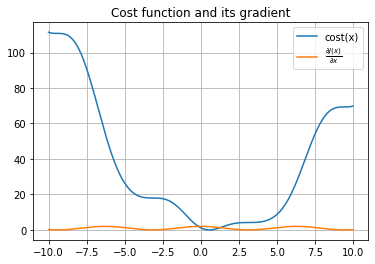

In [111]:
xx = np.linspace(-10, 10, 1000)
costJ = [cost(y,g,i) for i in xx]
grad = [J(i) for i in xx]
plt.plot(xx, costJ, linestyle='-', label='cost(x)')
plt.plot(xx, grad, linestyle='-', label=r'$\frac{\partial J (x)}{ \partial x}$')
plt.legend()
plt.grid()
plt.title('Cost function and its gradient')
plt.show()

#### Gauss-Newton with line search

In [118]:
def gauss_newton(g, x0, y, Ri, N):
    '''
    Gauss Newton with line search algorithm that minimizes cost(x)
    '''
    
    x0_path = np.zeros(N+1)
    y0_path = np.zeros(N+1)
    x0_path[0] = x0
    y0_path[0] = cost(y, g, x0)
    
    loss = []
    loss.append(y0_path[0])
    
    x_est = x0
    for i in range(N):
        Gv = J(x_est)
        dx = 1/(Gv * Ri * Gv) * Gv * Ri * (y - g(x_est))
        
        min_cost = cost(y, g, x_est)
        min_gam = 0
        
        for j in range(0,N):
            gam = j / N
            x_new = x_est + gam * dx
            curr_cost = cost(y, g, x_new)
            if curr_cost < min_cost:
                min_gam = gam
                min_cost = curr_cost
        
        x_est = x_est + min_gam * dx
        x0_path[i+1] = x_est[0]
        y0_path[i+1] = curr_cost
        loss.append(curr_cost - y0_path[i])
        print(x_est)

    print('local minima x = ', x_est, ', current cost = ', curr_cost)
    
    return x0_path, y0_path, loss


### Initialize parameters

In [119]:
y = np.array([1.1])
Ri = np.array([1])
x0 = np.array([2.5])
N = 10

[0.49003472]
[0.55664301]
[0.56395289]
[0.56469232]
[0.56476636]
[0.56477376]
[0.5647745]
[0.56477457]
[0.56477458]
[0.56477458]
local minima x =  [0.56477458] , current cost =  [2.30310114e-20]


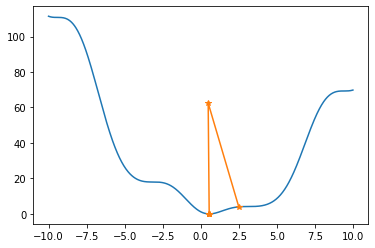

In [120]:
# compute 
x0_path, y0_path, loss = gauss_newton(g, x0, y, Ri, N)
plt.plot(xx,costJ)
plt.plot(x0_path,y0_path,'*-')     


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


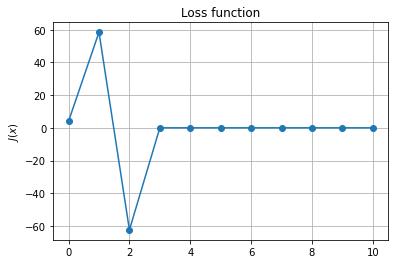

In [121]:
# plot loss
plt.plot(loss, 'o-')
plt.grid()
plt.title('Loss function')
plt.ylabel(r'$J(x)$')
plt.show()